In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

#get data
tab = '/mnt/aitrics_ext/ext01/mandy/data/apollo_sameday/tabular_data.csv'
df_tab = pd.read_csv(tab)
df_tab = df_tab.dropna(subset=['CO'])
labels = list(df_tab['PCWP_mean'])

# PCLR, RHC Representations
pclr_reprs = np.load('pclr.npy') #pt_no, 320dim
# rhc_reprs = np.load('/storage/hyewonjeong/RHCnet/rhc.npy') #pt_no, 320dim

k_nb = 2

In [3]:
pclr_reprs.shape

(6290, 320)

In [9]:
dist = pclr_reprs[1,:] - pclr_reprs[2,:]
euc_dist = np.sqrt(np.dot(dist.T, dist))

In [17]:
pts = pclr_reprs.shape[0]
plot_dists = []

for i in range(pts):
    for j in range(pts):
        dist = pclr_reprs[i,:] - pclr_reprs[j,:]
        euc_dist = np.sqrt(np.dot(dist.T, dist))
        label_dist = np.abs(labels[i]-labels[j])
        dists = [euc_dist, label_dist]
        plot_dists.append(dists)

In [29]:
plot_dist = np.asarray(plot_dists)

In [15]:
label_dist = np.abs(labels[1]-labels[2])

In [16]:
print(label_dist)

14.0


/home/mandy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

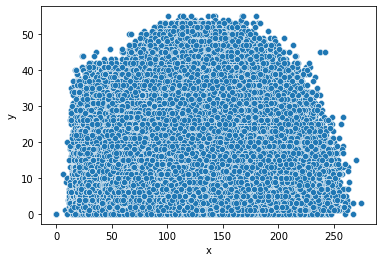

In [25]:
df = pd.DataFrame(plot_dists, columns=["x", "y"])
sns.scatterplot(df["x"], df["y"]).plot()

# sns.scatterplot(data = df, x="|x1-x2|", y="|p1-p2|")

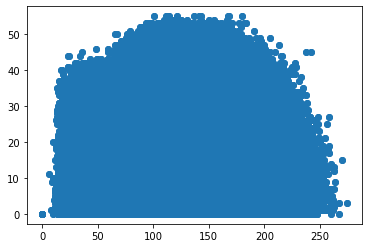

In [33]:
plt.scatter(plot_dist[:,0],plot_dist[:,1])
plt.show()

In [32]:
plot_dist[:,:].shape

(39564100, 2)